In [94]:
%matplotlib inline
from scipy import stats
import pandas as pd
import math
import nsfg
preg = nsfg.ReadFemPreg()

Goal: Split first borns from others. Create and graph PMF and CDF of birth weights. Determine your percentile rank

In [61]:
my_weight = 8.5 # pounds

Splitting First Borns from others

In [50]:
live_births = preg[['outcome','totalwgt_lb','birthord']][preg.outcome == 1]
first = live_births[live_births.birthord == 1]
other = live_births[live_births.birthord != 1]
first.count(), other.count()

(outcome        4413
 totalwgt_lb    4363
 birthord       4413
 dtype: int64, outcome        4735
 totalwgt_lb    4675
 birthord       4735
 dtype: int64)

In [ ]:
Creating and graphing PMF

1.24631769771 percent probability


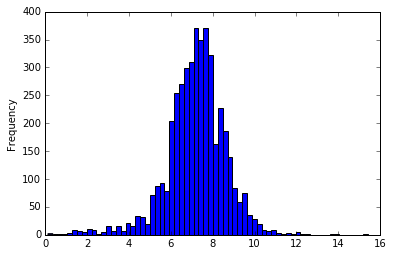

In [85]:
pmf = first.totalwgt_lb.value_counts().sort_index()/len(first.totalwgt_lb)
print pmf[my_weight] * 100, 'percent probability'
first.totalwgt_lb.plot.hist(bins = int(math.sqrt(4363)))

1.58394931362 percent probability


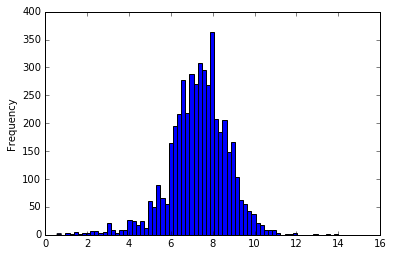

In [86]:
pmfother = other.totalwgt_lb.value_counts().sort_index()/len(other.totalwgt_lb)
print pmfother[my_weight] * 100, 'percent probability'
other.totalwgt_lb.plot.hist(bins = int(math.sqrt(4675)))

Create and graph Cumulative Distribution Function

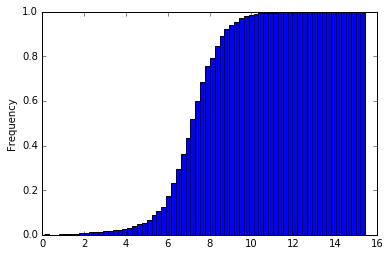

In [79]:
first.totalwgt_lb.plot.hist(cumulative = True, normed = 1, bins = int(math.sqrt(4363)), figsize = (6,4))

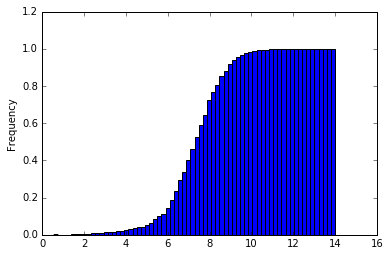

In [80]:
other.totalwgt_lb.plot.hist(cumulative = True, normed = 1, bins = int(math.sqrt(4675)), figsize = (6,4))

In [87]:
cumsum_other = pmfother.cumsum()
cumsum_first = pmf.cumsum()
cumsum_other[my_weight], cumsum_first[my_weight]

(0.81309398099260843, 0.84930886018581464)

Goal:
    -Use random.random to generate 1000 random numbers
    -Create and graph the results PMF and CDF
    -Is the distribution uniform?

In [103]:
import random
ran_num = [random.random() for x in xrange(1000)]
ran_numbers = pd.DataFrame(ran_num)
ran_numbers.columns = ['numbers']

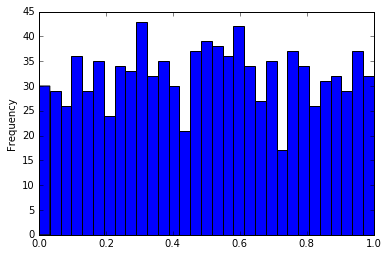

In [109]:
random_pmf = ran_numbers.numbers.value_counts().sort_index()/len(ran_num)
ran_numbers.numbers.plot.hist(bins = int(math.sqrt(1000)))

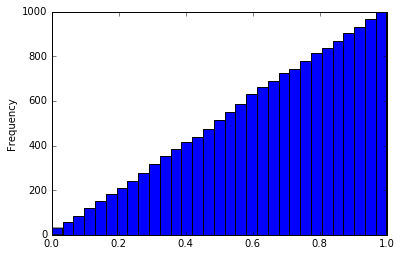

In [111]:
ran_numbers.numbers.plot.hist(cumulative = True, bins = int(math.sqrt(1000)))

According to the CDF, the distribution is uniform. 